In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pylab as plt
import seaborn as sns
from wordcloud import WordCloud
from pickle import dump
from pickle import load
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy
from afinn import Afinn
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix, classification_report

In [2]:
def map_sentiment(rating):
    if rating <= 2:
        return 0 #negative review
    else:
        return 1 #positive review

df = pd.read_csv("../CSVInUse/HolidayInnReview.csv")
# drop duplicated index column
df = df.iloc[:, 1:]
df['Sentiment'] = [map_sentiment(x) for x in df['Rating']]
df.head(10)

,Customer_name,Rating,Review_Title,Review,Sentiment
0,Rafiq Irfan,4,Good location and helpful staff,Very convenient location where you can find fo...,1
1,fmoulsen,5,Thank you IHG EXPRESS Orchard,I enjoyed my 10days stay at this hotel. Had sm...,1
2,Fau,1,"Inferior Product, Low Value for Money Hotel",The small sister from Holiday Inn did not look...,0
3,Itravel0ne,4,Convenient and good stay,The location is great and centrally located. E...,1
4,Mystery,2,Need to improve,Stay there for staycation 3 day 2 nights. The ...,0
5,Elizabeth L,2,First hotel I have stayed at that I had to mak...,Apparently due to covid housekeeping now only ...,0
6,alexserapio,5,Hospitable Staff,Very accommodating front desk staff-Mika and G...,1
7,Sundari,5,Duty Manager Naqiah& Nabila staff is friendly ...,"im so happy i stay here with my family, Naqiah...",1
8,Entrepreneur,5,"Brilliant hotel, great people and second home!",If there is one hotel which one can come close...,1
9,Joel Cruz,4,Friendly & warm staff & you feel at home!,Location of this hotel is perfect if you love ...,1


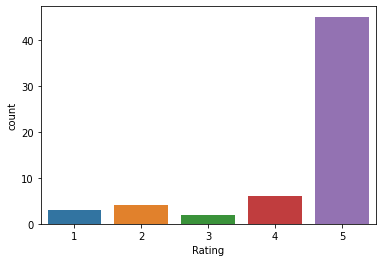

In [3]:
# generate barchart based on hotel ratings 
df = pd.read_csv("../CSVInUse/HolidayInnReview.csv")
sns.countplot(x ='Rating', data = df)
plt.show()

In [4]:
wordnet=WordNetLemmatizer()
stop_words=stopwords.words('english')
not_stopwords = ("aren", "aren't", "couldn", "couldn't", "didn", "didn't",
                 "doesn", "doesn't", "don", "don't", "hadn", "hadn't", "hasn",
                 "hasn't", "haven", "haven't", "isn", "isn't", "mustn",
                 "mustn't", "no", "not", "only", "shouldn", "shouldn't",
                 "should've", "wasn", "wasn't", "weren", "weren't", "will",
                 "wouldn", "wouldn't", "won't", "very")
stop_words_ = [words for words in stop_words if words not in not_stopwords]
stop_words_.append("I")
stop_words_.append("the")
stop_words_.append("s")
stop_words_.extend([
    "will", "always", "go", "one", "very", "good", "only", "mr", "lot", "two",
    "th", "etc", "don", "due", "didn", "since", "nt", "ms", "ok", "almost",
    "put", "pm", "till", "add", "let", "hotel", "able", "per", "st", 
    "couldn", "yet", "par", "hi", "well", "would", "I", "the", "s", 
    "also", "great", "get", "like", "take", "thank"
])
print(stop_words_)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'nor', 'own', 'same', 'so', 'than', 'too', 's', 't', 'can'

In [5]:
nlp=spacy.load('en_core_web_sm')
reviewtext = []

for i in range(0, len(df)):
    df['Review_Combined'] = df['Review_Title'] + str(' ') + df['Review']
    review = re.sub('[^a-zA-Z]', ' ', df['Review_Combined'][i])
    review = review.lower()
    review = review.split()
    review = nlp(' '.join(review))
    review = [token.lemma_ for token in review]
    review = [word for word in review if word not in stop_words_]
    review = ' '.join(review)
    reviewtext.append(review)

pd.DataFrame(reviewtext).head()

,0
0,location helpful staff convenient location fin...
1,ihg express orchard enjoy day stay small bump ...
2,inferior product low value money small sister ...
3,convenient stay location centrally locate easy...
4,need improve stay staycation day night check f...


In [6]:
df['Cleaned_Review'] = reviewtext
clean_review_words = " ".join(df['Cleaned_Review'])
clean_review_words = clean_review_words.split()
all_words = len(clean_review_words)
print('Total number of words in cleaned review is {}'.format(all_words))
word_freq = nltk.FreqDist(clean_review_words)
freq_data_all = pd.DataFrame(word_freq.most_common(all_words), columns=['Word', 'Frequency'])
freq_data_all['Percentage'] = round(((freq_data_all.Frequency / freq_data_all.Frequency.sum()) * 100),2)
print('No of unique words {}'.format(len(freq_data_all)))
print(freq_data_all[0:10])
# run afn then run next histplot

Total number of words in cleaned review is 2499
No of unique words 646
         Word  Frequency  Percentage
0        room         77        3.08
1        stay         70        2.80
2       staff         63        2.52
3     service         42        1.68
4         day         32        1.28
5  quarantine         29        1.16
6         not         28        1.12
7       clean         28        1.12
8    location         24        0.96
9        need         23        0.92


<AxesSubplot:xlabel='Cleaned_Review', ylabel='Count'>

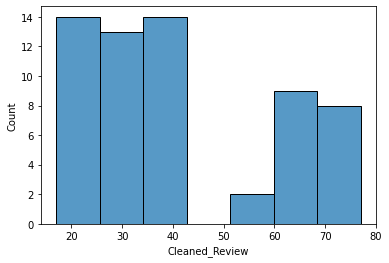

In [13]:
# generate barchart based on word count for cleaned reviews 
df['Cleaned_Review'] = pd.Series([len(item.split()) for item in df['Cleaned_Review']])
sns.histplot(df['Cleaned_Review'])

In [7]:
afn=Afinn()
score = [afn.score(item) for item in df['Cleaned_Review']]
Affin_sentiment = [1 if score > 0 else 0 for score in score]
df['Affin_score'] = score
df['Affin_sentiment'] = Affin_sentiment
df[df['Affin_sentiment'] == 0]['Cleaned_Review']
# run positive wordcloud next

5     first stay make bed apparently covid housekeep...
10    first stay make bed apparently covid housekeep...
36    quanrantine day bad experience doubt comment t...
41    quanrantine day bad experience doubt comment t...
59    consistently late meal delivery assign serve q...
Name: Cleaned_Review, dtype: object

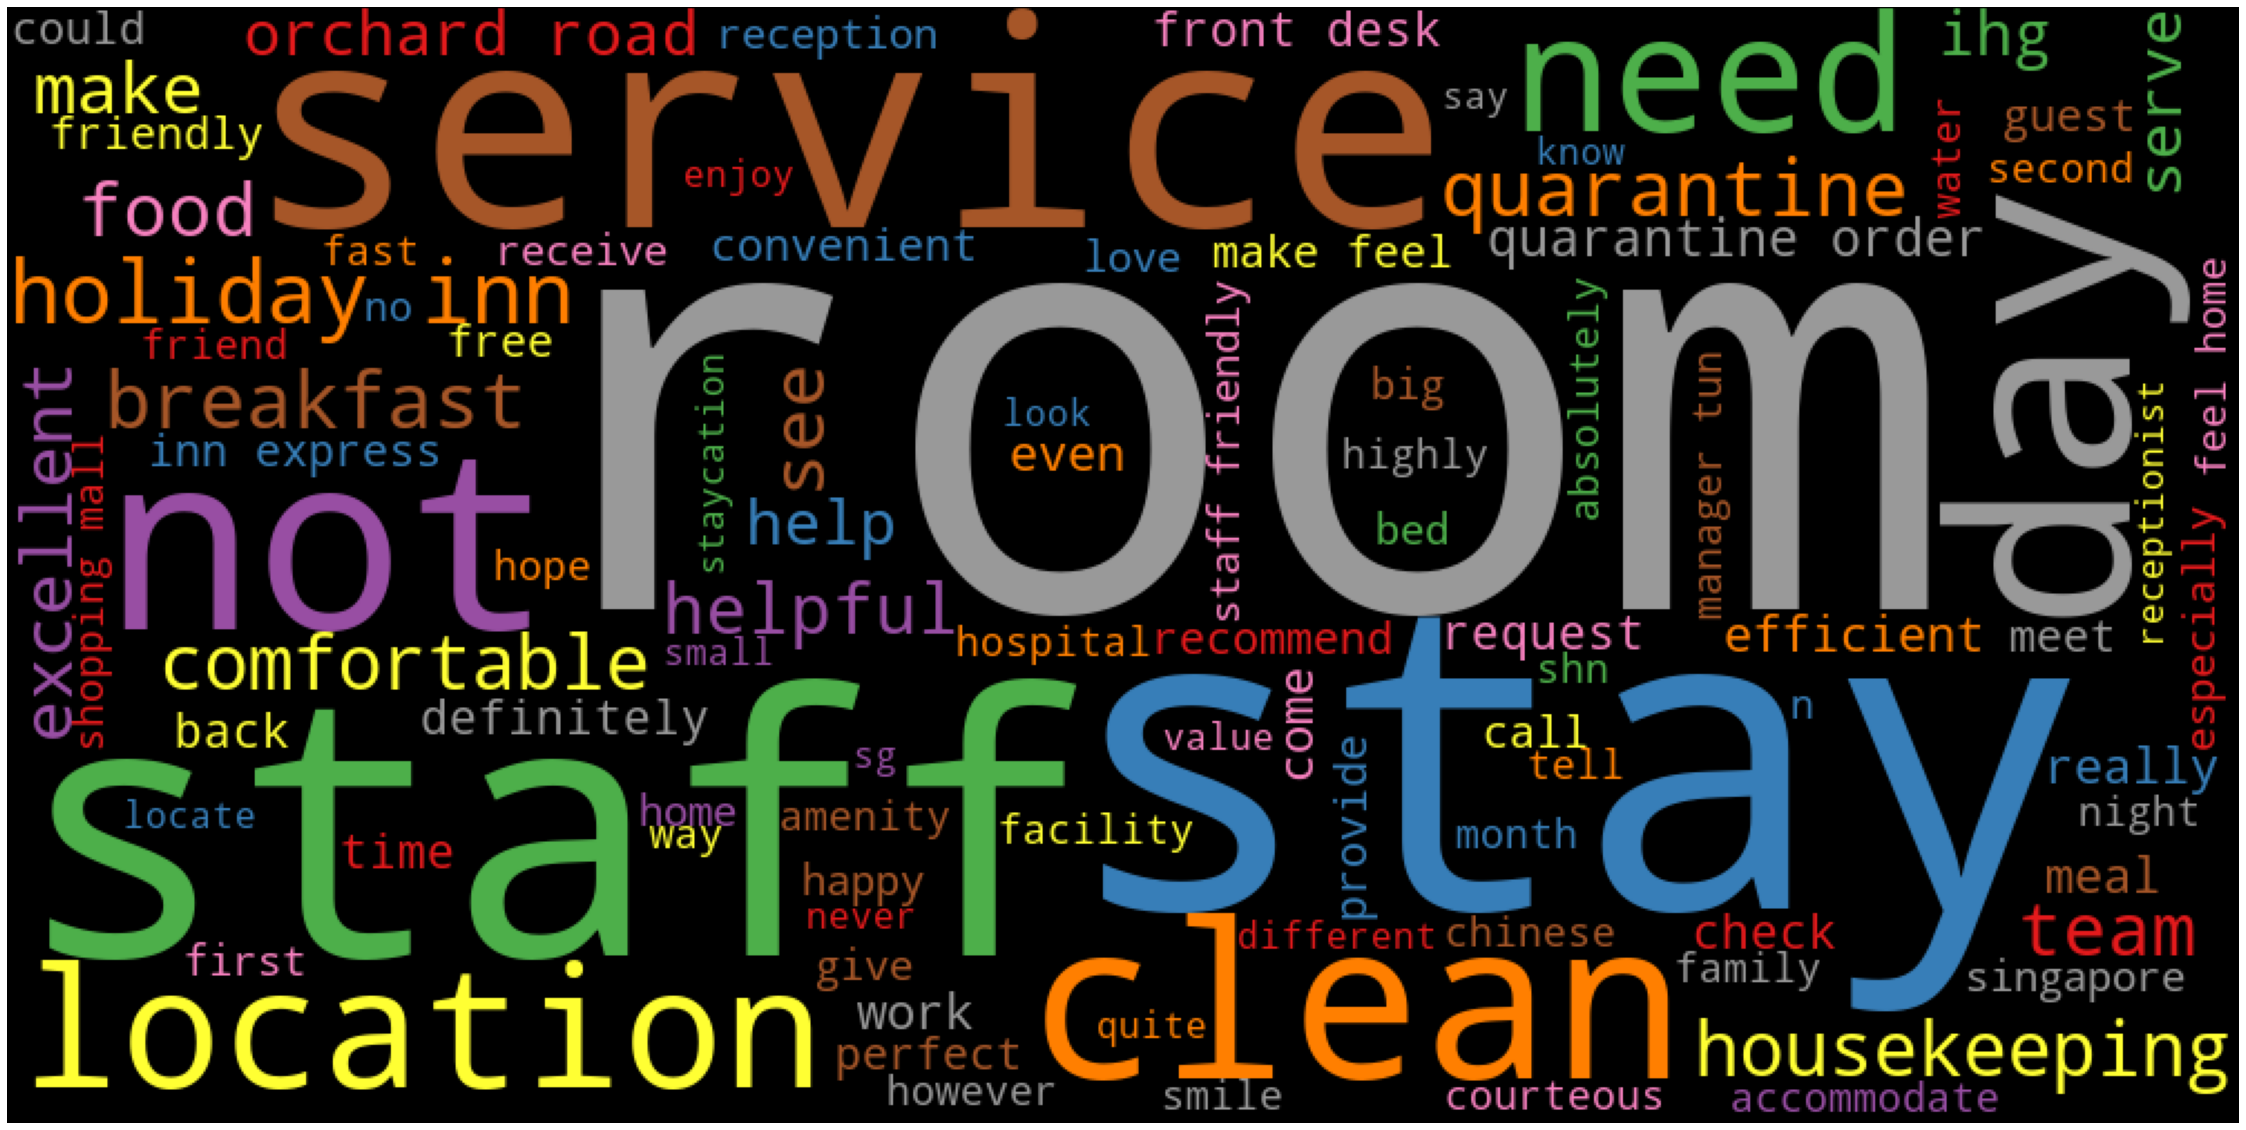

In [8]:
# generate wordcloud based on most frequently typed word in review text
wordcloud = WordCloud(
    width=1000,
    height=500,
    colormap='Set1',
    stopwords=stop_words_,
    max_words=100
).generate(str(reviewtext))

plt.figure(figsize=(40, 30))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

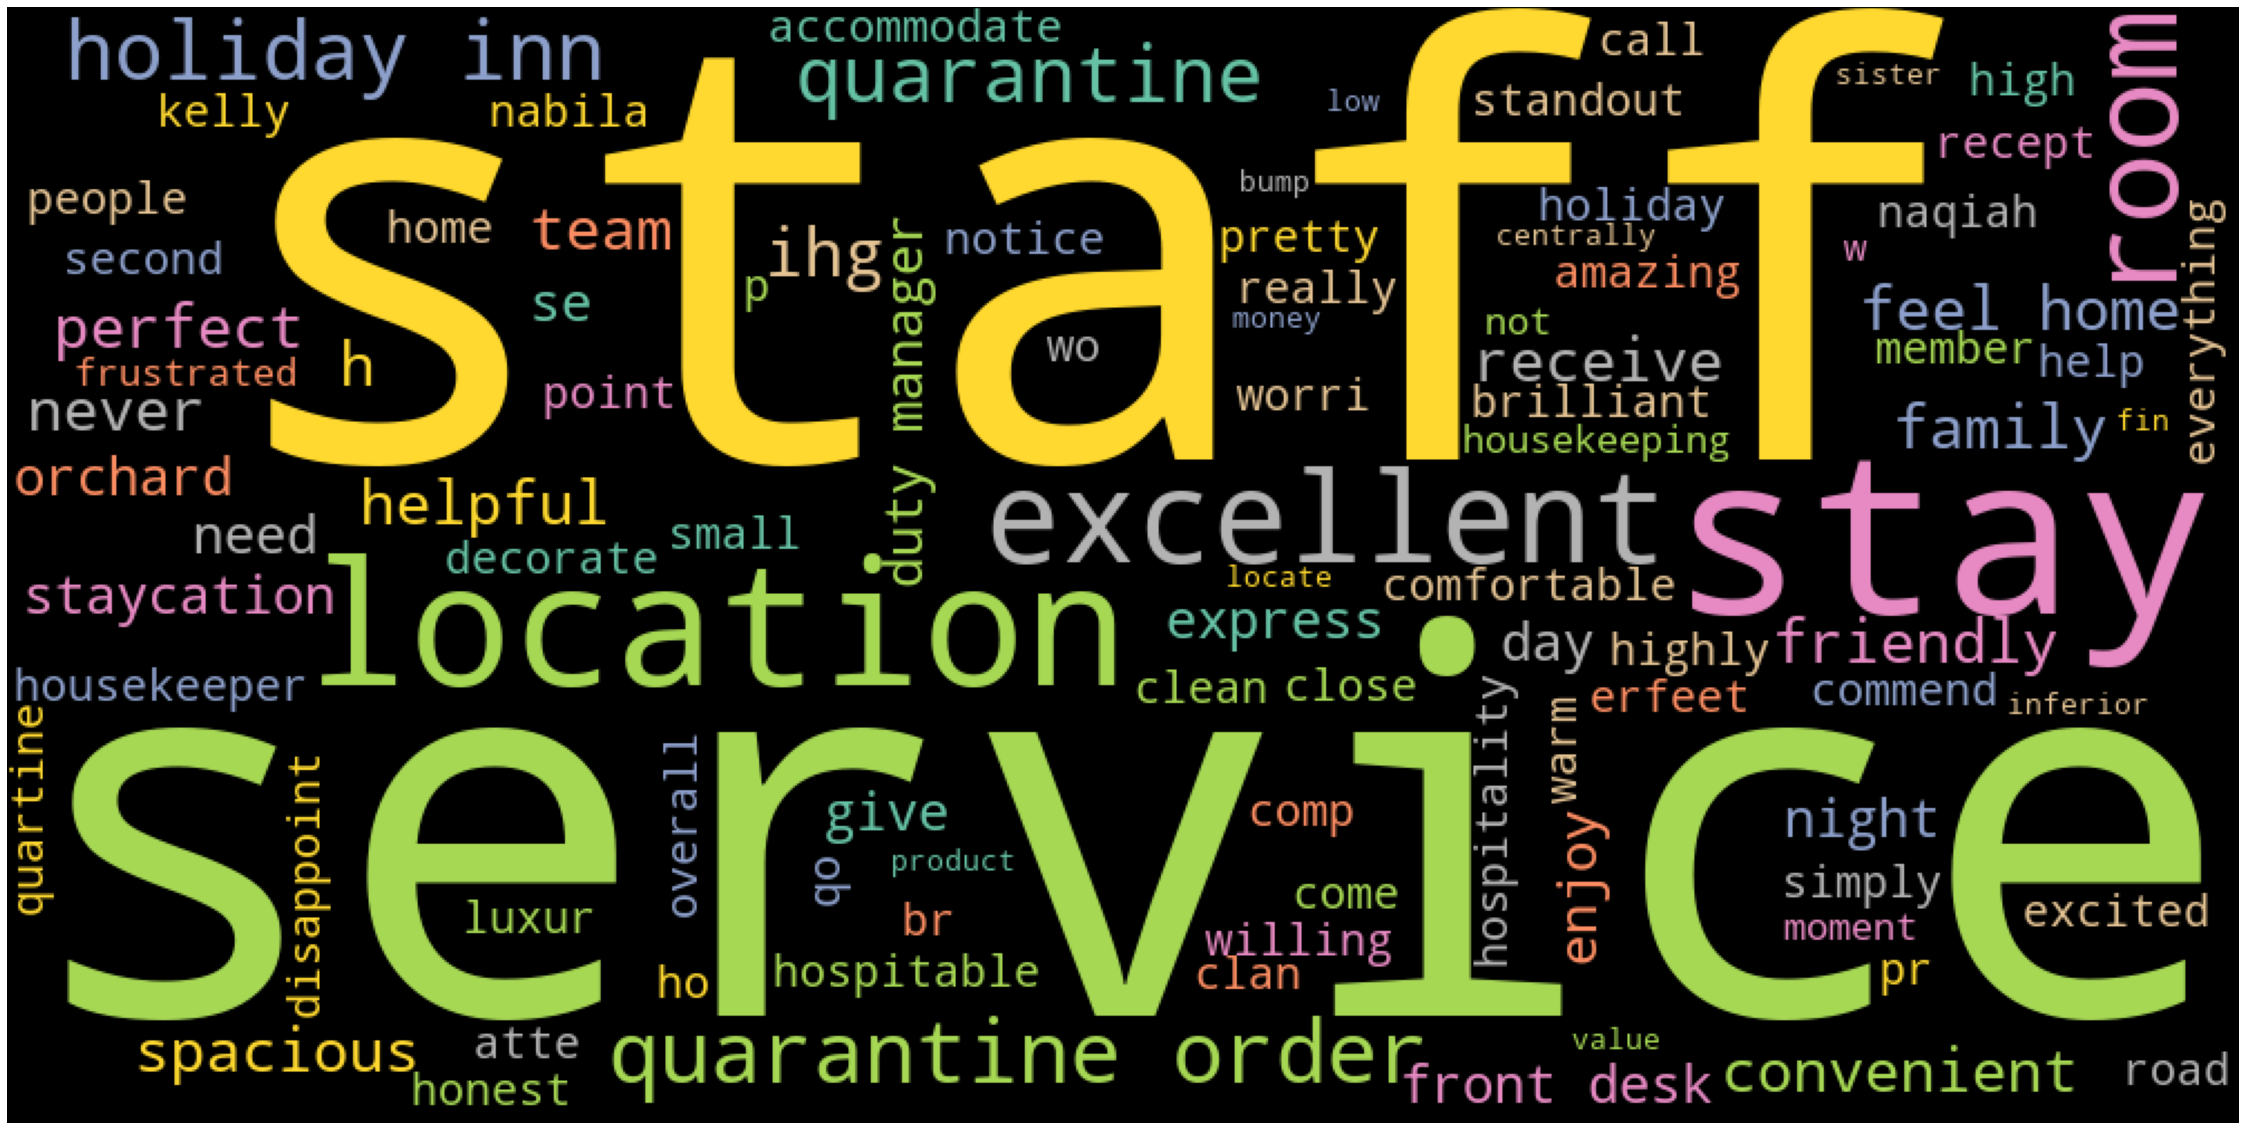

In [9]:
# generate wordcloud based on most frequently typed word in positive sentiment review text
wordcloud = WordCloud(
    width=1000,
    height=500,
    colormap='Set2',
    stopwords=stop_words_,
    max_words=100
).generate(str(df[df['Affin_sentiment'] == 1]['Cleaned_Review']))

plt.figure(figsize=(40, 30))
plt.imshow(wordcloud)
plt.axis('off')
# run afinn again before running this wordcloud
plt.show()

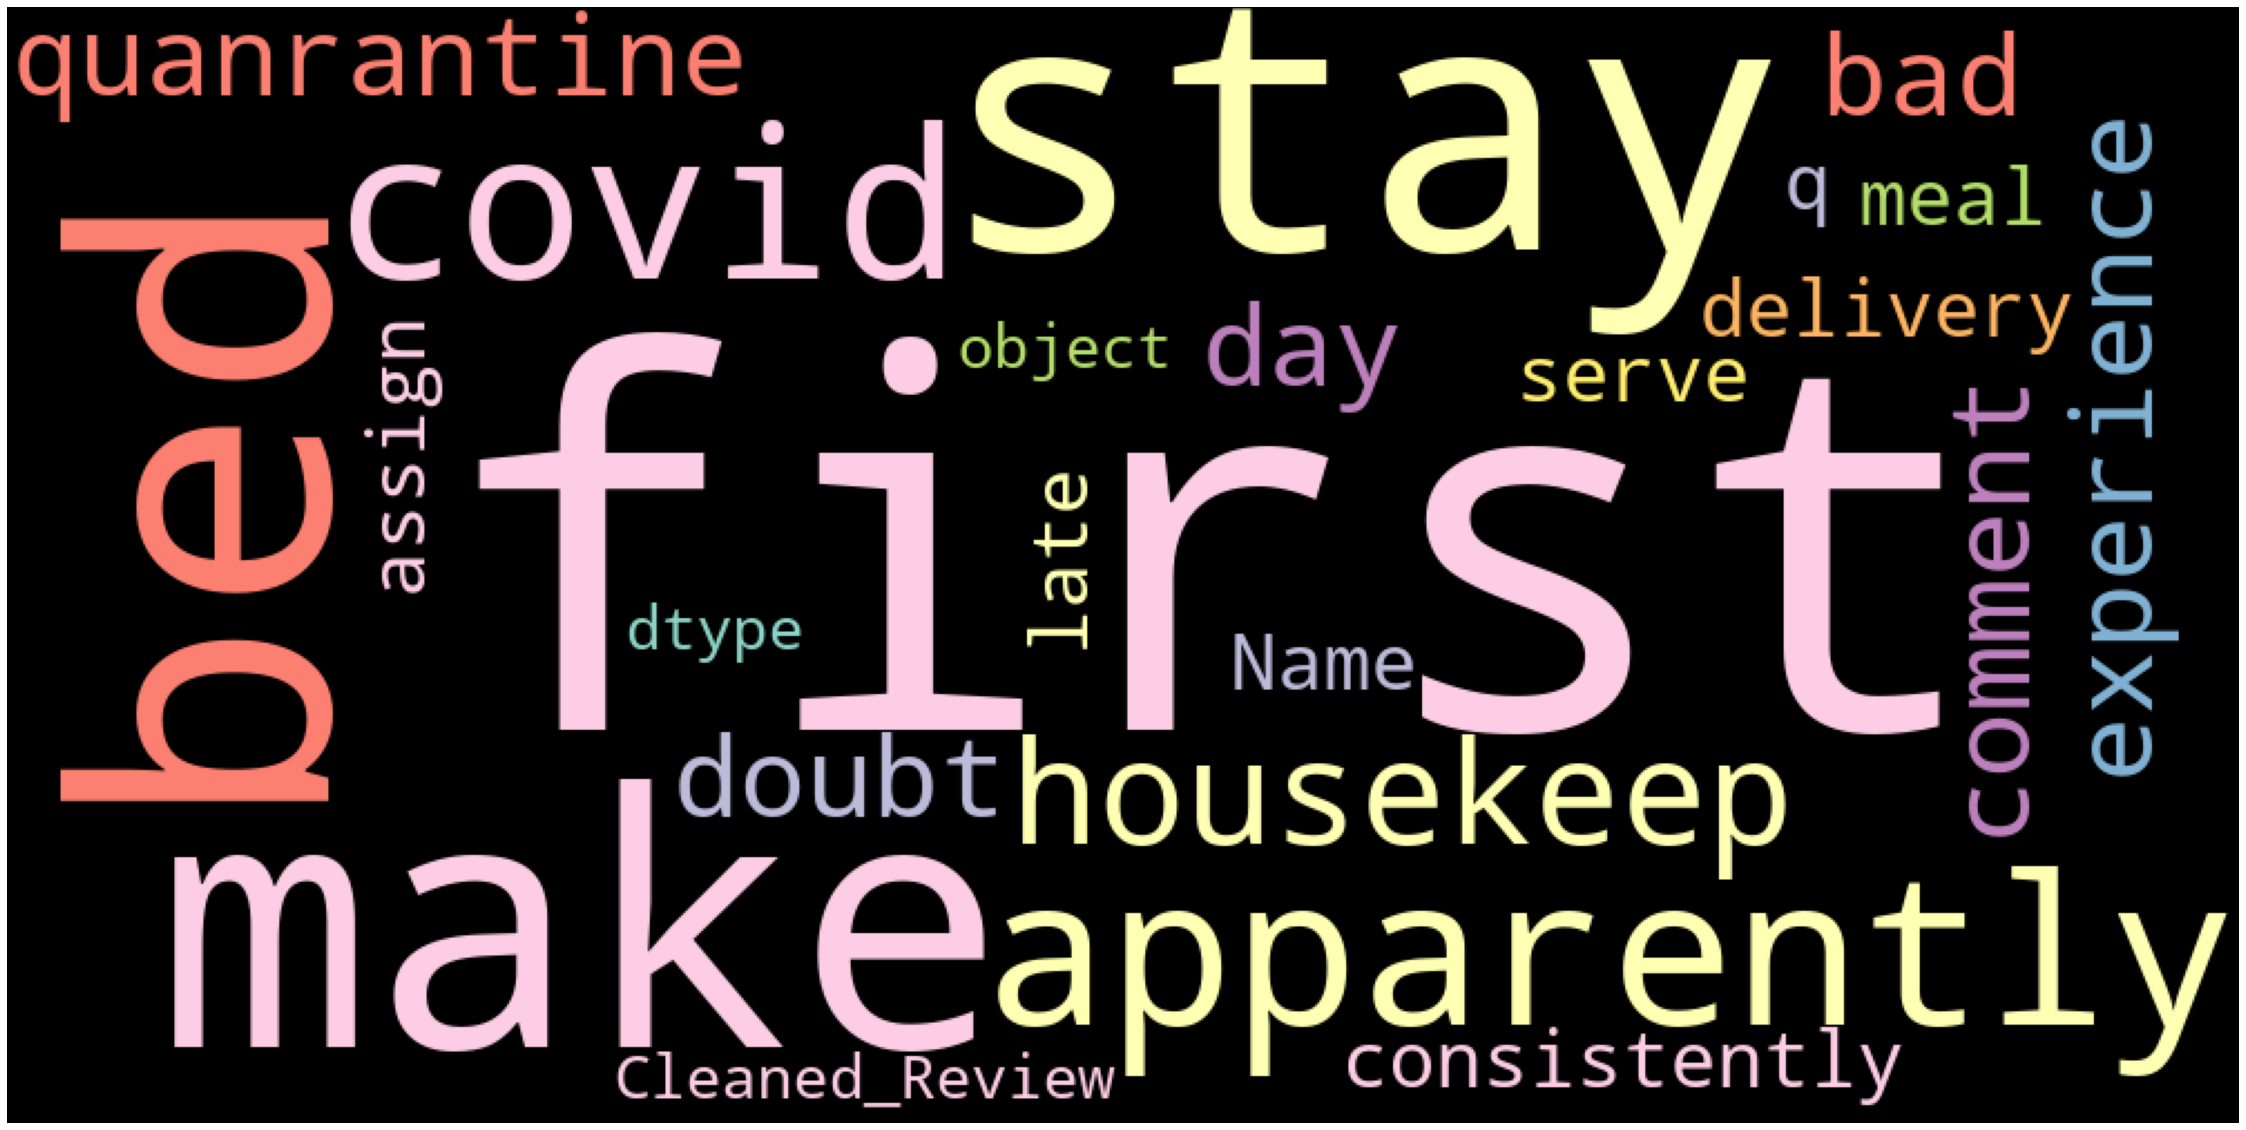

In [10]:
# generate wordcloud based on most frequently typed word in negative sentiment review text
wordcloud = WordCloud(
    width=1000,
    height=500,
    colormap='Set3',
    stopwords=stop_words_,
    max_words=100
).generate(str(df[df['Affin_sentiment'] == 0]['Cleaned_Review']))

plt.figure(figsize=(40, 30))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

<AxesSubplot:title={'center':'review terms by frequency'}>

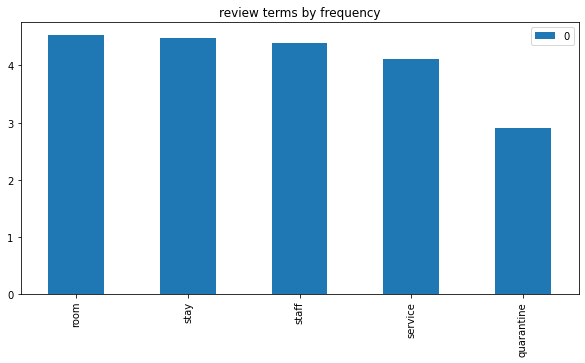

In [11]:
# generate barchart based on review text term frequency
tfidf2 = TfidfVectorizer(norm="l2", analyzer='word', stop_words=stop_words_, ngram_range=(1,1))
tfidf2_x = tfidf2.fit_transform(reviewtext)
termfreq = pd.DataFrame(tfidf2_x.sum(axis=0), columns=tfidf2.get_feature_names()).T.sort_values(0, ascending=False).head()
termfreq.plot(kind='bar', title='review terms by frequency', figsize=(10, 5))

In [18]:
# machine learning model function
def c_matrix(X_train, X_test, y_train, y_test, model):
    # make prediction
    predict_train = model.predict(X_train)
    predict_test = model.predict(X_test)
    # test accuracy
    accuracy_train = model.score(X_train, y_train)
    accuracy_test = model.score(X_test, y_test)
    print('Accuracy for Train set {}'.format(accuracy_train))
    print('Accuracy for Test set {}'.format(accuracy_test))
    # f1 score = 2 * (precision * recall) / (precision + recall)
    f1_score = metrics.f1_score(y_train, predict_train)
    # print 1 can classify observation into correct class vs 0 cannot
    print('F1 Score {}'.format(f1_score))
    print(classification_report(y_test, predict_test))
    plot_confusion_matrix(estimator=model, X=X_test, y_true=y_test, cmap = 'rainbow')
    plt.grid(False)
# oversampling 
over = SMOTE(sampling_strategy=1, random_state=0, k_neighbors=1)
# over = SMOTE(k_neighbors=1)
# convert word token to feature vector for vocab input 
tfidf = TfidfVectorizer(max_features=3000, ngram_range=(1,1))
review_tfidf = tfidf.fit_transform(reviewtext)
X_over, y_over = over.fit_resample(review_tfidf, df['Affin_sentiment'])
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, random_state=7, test_size=0.20, stratify=y_over)


Accuracy for Train set 1.0
Accuracy for Test set 1.0
F1 Score 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        11

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22



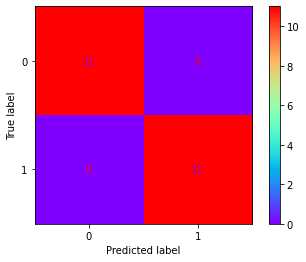

In [19]:
# regression test
model_lr = LogisticRegression(C=5, penalty='l2', random_state=0)
model_lr.fit(X_train, y_train)
c_matrix(X_train, X_test, y_train, y_test, model_lr)

Accuracy for Train set 0.5340909090909091
Accuracy for Test set 0.5454545454545454
F1 Score 0.1276595744680851
              precision    recall  f1-score   support

           0       0.52      1.00      0.69        11
           1       1.00      0.09      0.17        11

    accuracy                           0.55        22
   macro avg       0.76      0.55      0.43        22
weighted avg       0.76      0.55      0.43        22



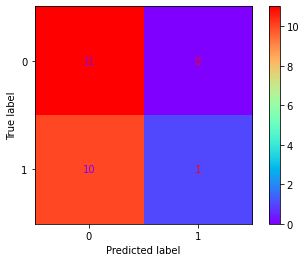

In [20]:
# KNN
model_knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
model_knn.fit(X_train, y_train)
c_matrix(X_train, X_test, y_train, y_test, model_knn)

Accuracy for Train set 0.9886363636363636
Accuracy for Test set 1.0
F1 Score 0.9885057471264368
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        11

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22



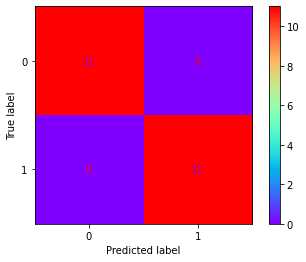

In [21]:
# Naive Bayes
model_naive = MultinomialNB()
model_naive.fit(X_train, y_train)
c_matrix(X_train, X_test, y_train, y_test, model_naive)